# Latent Dirichlet Allocation

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet
from nltk import ne_chunk
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [12]:
import pandas as pd

df = pd.read_csv('data', sep=",", header=None)

df.columns = ['text']

df.head()

,text
0,From: gld@cunixb.cc.columbia.edu (Gary L Dare)...
1,From: atterlep@vela.acs.oakland.edu (Cardinal ...
2,From: miner@kuhub.cc.ukans.edu\nSubject: Re: A...
3,From: atterlep@vela.acs.oakland.edu (Cardinal ...
4,From: vzhivov@superior.carleton.ca (Vladimir Z...


The data is a collection of emails that are not labelled. Let's try extract topics from them!

## Preprocessing 

👇 You're used to it by now... Clean up! Store the cleaned text in a new dataframe column "clean_text".

In [15]:
stop_words=set(nltk.corpus.stopwords.words('english'))
def clean_text(headline):
  le=WordNetLemmatizer()
  word_tokens=word_tokenize(headline)
  tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
  cleaned_text=" ".join(tokens)
  return cleaned_text

In [20]:
df['cleaned_text']=df['text'].apply(clean_text)
df.drop(['text'],axis=1,inplace=True)

In [21]:
df

,cleaned_text
0,From cunixb.cc.columbia.edu Gary Dare Subject ...
1,From atterlep vela.acs.oakland.edu Cardinal Xi...
2,From miner kuhub.cc.ukans.edu Subject Ancient ...
3,From atterlep vela.acs.oakland.edu Cardinal Xi...
4,From vzhivov superior.carleton.ca Vladimir Zhi...
...,...
1194,From jerryb eskimo.com Jerry Kaufman Subject p...
1195,From golchowy alchemy.chem.utoronto.ca Gerald ...
1196,From jayne mmalt.guild.org Jayne Kulikauskas S...
1197,From sclark epas.utoronto.ca Susan Clark Subje...


## Latent Dirichlet Allocation model

👇 Train an LDA model to extract potential topics.

In [47]:
vect =TfidfVectorizer(stop_words=stop_words)


In [48]:
vect_text=vect.fit_transform(df['cleaned_text'])

In [49]:
print(vect_text.shape)
print(vect_text)

(1199, 19931)
  (0, 17159)	0.05047422098145155
  (0, 16233)	0.060644446378693095
  (0, 3733)	0.06193906487144554
  (0, 5864)	0.07399695249947692
  (0, 10496)	0.05784506409037717
  (0, 19593)	0.056396595555467034
  (0, 16958)	0.07399695249947692
  (0, 8167)	0.08963129331733377
  (0, 17216)	0.09949546411679638
  (0, 7378)	0.0658089509373402
  (0, 18464)	0.10526563413519065
  (0, 14521)	0.07180323567090816
  (0, 16185)	0.10526563413519065
  (0, 12476)	0.09540146333572803
  (0, 15740)	0.06770923488983978
  (0, 11443)	0.09540146333572803
  (0, 11140)	0.07114120977989094
  (0, 17142)	0.09949546411679638
  (0, 19331)	0.08963129331733377
  (0, 17132)	0.08236173882315087
  (0, 4723)	0.05487427636029884
  (0, 8986)	0.08100538057935355
  (0, 16209)	0.08963129331733377
  (0, 18164)	0.054669510377262635
  (0, 11929)	0.19899092823359277
  :	:
  (1198, 17802)	0.09278163306897697
  (1198, 8227)	0.11038655942755152
  (1198, 19691)	0.0652197061584131
  (1198, 16003)	0.1923979568578704
  (1198, 17267)	0.

In [50]:
idf=vect.idf_

In [51]:
dd=dict(zip(vect.get_feature_names(), idf))
l=sorted(dd, key=(dd).get)
# print(l)
print(l[0],l[-1])
print(dd['subject'])
print(dd['schism'])  # police is most common and forecast is least common among the news headlines.

subject zzzzzz
1.0
5.892852258439873


In [52]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=42,max_iter=1) 

In [53]:
lda_top=lda_model.fit_transform(vect_text)

In [54]:
print(lda_top.shape)  # (no_of_doc,no_of_topics)
print(lda_top)

(1199, 10)
[[0.00900408 0.91896216 0.00900402 ... 0.00900401 0.00900402 0.00900561]
 [0.0089863  0.91912243 0.00898629 ... 0.00898624 0.00898656 0.00898626]
 [0.00831611 0.92515369 0.00831611 ... 0.00831609 0.00831604 0.00831606]
 ...
 [0.01031977 0.90712185 0.01031977 ... 0.01031977 0.01031976 0.01031977]
 [0.01931757 0.82614109 0.01931755 ... 0.0193175  0.01931751 0.0193176 ]
 [0.01117575 0.89941805 0.01117574 ... 0.01117581 0.01117572 0.01117574]]


In [55]:
sum=0
for i in lda_top[0]:
  sum=sum+i
print(sum)  

1.0000000000000002


In [57]:
print("Document 0: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

Document 0: 
Topic  0 :  0.9004079406042682 %
Topic  1 :  91.89621636719716 %
Topic  2 :  0.900402249410877 %
Topic  3 :  0.9003894072370403 %
Topic  4 :  0.9004461084872741 %
Topic  5 :  0.9003821108212733 %
Topic  6 :  0.9003927048028971 %
Topic  7 :  0.9004009281686707 %
Topic  8 :  0.9004015242378025 %
Topic  9 :  0.900560659032765 %


In [58]:
print(lda_model.components_)
print(lda_model.components_.shape)  # (no_of_topics*no_of_words)

[[0.70190697 0.31851761 0.27152417 ... 0.29404335 0.29214525 0.26810741]
 [3.28737886 0.8656421  0.33651835 ... 0.39997244 0.65706053 0.40960203]
 [0.31940251 0.35938452 0.30414171 ... 0.29687966 0.26634571 0.24697735]
 ...
 [0.27217141 0.36408772 0.24029717 ... 0.27840202 0.28103494 0.28372199]
 [0.28664824 0.26037899 0.25709037 ... 0.28055421 0.28697867 0.24771962]
 [0.38595926 0.29290693 0.30204984 ... 0.2695174  0.29671512 0.24579212]]
(10, 19931)


In [59]:
vocab = vect.get_feature_names()
for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
mary 00 selanne period 14 biggest 11 team 10 15 

Topic 1: 
edu game ca would team people subject lines organization university 

Topic 2: 
testing milwaukee center 23064rfl tennessee khettry r1w2 admirals utk edu 

Topic 3: 
paul huot cray jesus sabbath aids ayari faith anger lord 

Topic 4: 
edu captain hrivnak gtd597a buffalo gatech andrew prism traded hammerl 

Topic 5: 
ferguson baseball rochester espn player coverage team com game adobe 

Topic 6: 
gchin kulikauskas view easter eng bible ssf word whore marriage 

Topic 7: 
maria claremont book trade edu boston fisher walsh work coverage 

Topic 8: 
suhonen hut tommi easter vipunen keenan jokerit fi tvartiai ishtar 

Topic 9: 
columbia cunixb dare gary jets cc edu 348 winnipeg ca 



In [60]:
from wordcloud import WordCloud
# Generate a word cloud image for given topic
def draw_word_cloud(index):
  imp_words_topic=""
  comp=lda_model.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

## Visualize potential topics

👇 The function to print the words associated with the potential topics is already made for you. You just have to pass the correct arguments!

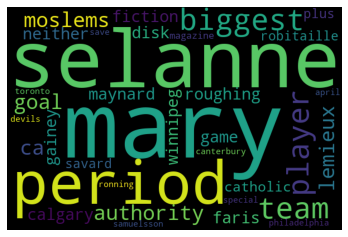

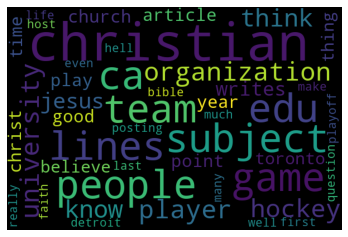

In [61]:
for i in range(0,2):
    draw_word_cloud(i)
    

## Predict topic of new text

👇 You can now use your LDA model to predict the topic of a new text. First, use your vectorizer to vectorize the example. Then, use your LDA model to predict the topic of the vectorized example.

In [63]:
df

,cleaned_text
0,From cunixb.cc.columbia.edu Gary Dare Subject ...
1,From atterlep vela.acs.oakland.edu Cardinal Xi...
2,From miner kuhub.cc.ukans.edu Subject Ancient ...
3,From atterlep vela.acs.oakland.edu Cardinal Xi...
4,From vzhivov superior.carleton.ca Vladimir Zhi...
...,...
1194,From jerryb eskimo.com Jerry Kaufman Subject p...
1195,From golchowy alchemy.chem.utoronto.ca Gerald ...
1196,From jayne mmalt.guild.org Jayne Kulikauskas S...
1197,From sclark epas.utoronto.ca Susan Clark Subje...


In [77]:
df['topic'] = lda_top.argmax(axis=1)
df

,cleaned_text,topic
0,From cunixb.cc.columbia.edu Gary Dare Subject ...,1
1,From atterlep vela.acs.oakland.edu Cardinal Xi...,1
2,From miner kuhub.cc.ukans.edu Subject Ancient ...,1
3,From atterlep vela.acs.oakland.edu Cardinal Xi...,1
4,From vzhivov superior.carleton.ca Vladimir Zhi...,1
...,...,...
1194,From jerryb eskimo.com Jerry Kaufman Subject p...,1
1195,From golchowy alchemy.chem.utoronto.ca Gerald ...,1
1196,From jayne mmalt.guild.org Jayne Kulikauskas S...,1
1197,From sclark epas.utoronto.ca Susan Clark Subje...,1


In [80]:
data=df[['cleaned_text','topic']]
data = pd.get_dummies(data, columns=['topic'])
data

,cleaned_text,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_9
0,From cunixb.cc.columbia.edu Gary Dare Subject ...,0,1,0,0,0,0,0
1,From atterlep vela.acs.oakland.edu Cardinal Xi...,0,1,0,0,0,0,0
2,From miner kuhub.cc.ukans.edu Subject Ancient ...,0,1,0,0,0,0,0
3,From atterlep vela.acs.oakland.edu Cardinal Xi...,0,1,0,0,0,0,0
4,From vzhivov superior.carleton.ca Vladimir Zhi...,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
1194,From jerryb eskimo.com Jerry Kaufman Subject p...,0,1,0,0,0,0,0
1195,From golchowy alchemy.chem.utoronto.ca Gerald ...,0,1,0,0,0,0,0
1196,From jayne mmalt.guild.org Jayne Kulikauskas S...,0,1,0,0,0,0,0
1197,From sclark epas.utoronto.ca Susan Clark Subje...,0,1,0,0,0,0,0


In [93]:
from sklearn.model_selection import train_test_split
train_p, test_p = train_test_split(data, random_state=42, test_size=0.25, shuffle=True)
x_train = train_p.cleaned_text
x_test = test_p.cleaned_text

In [94]:
print(x_train.shape)
print(x_test.shape)

(899,)
(300,)


In [95]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer,  CountVectorizer,TfidfTransformer  
pipeline = Pipeline([('vec', CountVectorizer()),('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])
parameters = {  
'tfidf__use_idf': (True, False),  
'tfidf__sublinear_tf': (True, False),  
'vec__binary': (True, False),  
'tfidf__norm': ('l1', 'l2'),  
'clf__alpha': (1, 0.1, 0.01)  
}  

In [96]:
classes = ['topic_0', 
              'topic_1',
              'topic_2', 
              'topic_3', 
              'topic_4', 
              'topic_5',
              'topic_9']

In [97]:
from sklearn.metrics import accuracy_score
for category in classes:
    print('... preprocessing {}'.format(category))

    pipeline.fit(x_train, train_p[category])

    prediction = pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test_p[category], prediction)))

... preprocessing topic_0
Test accuracy is 1.0
... preprocessing topic_1
Test accuracy is 0.9733333333333334
... preprocessing topic_2
Test accuracy is 0.9966666666666667
... preprocessing topic_3
Test accuracy is 1.0
... preprocessing topic_4
Test accuracy is 0.98
... preprocessing topic_5
Test accuracy is 1.0
... preprocessing topic_9
Test accuracy is 0.9966666666666667
